In [33]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
np.random.seed(42)

In [2]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
        estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting = 'hard')

In [3]:
X_moons, y_moons = datasets.make_moons(n_samples=500, noise=0.30, random_state=42)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, random_state=42)

In [4]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_moons_train, y_moons_train)
    y_pred = clf.predict(X_moons_test)
    print(clf.__class__.__name__,accuracy_score(y_moons_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'l

In [17]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state = 42), n_estimators = 500,
        max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True)
bag_clf.fit(X_moons_train, y_moons_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred = bag_clf.predict(X_moons_test)
accuracy_score(y_moons_test,y_pred)

0.904

In [19]:
bag_clf.oob_score_

0.9253333333333333

In [20]:
bag_clf.oob_decision_function_

array([[0.37665782, 0.62334218],
       [0.40583554, 0.59416446],
       [0.99748111, 0.00251889],
       [0.01470588, 0.98529412],
       [0.02356021, 0.97643979],
       [0.10741688, 0.89258312],
       [0.39322917, 0.60677083],
       [0.07349081, 0.92650919],
       [0.96163683, 0.03836317],
       [0.83421053, 0.16578947],
       [0.53180662, 0.46819338],
       [0.04381443, 0.95618557],
       [0.72467532, 0.27532468],
       [0.85714286, 0.14285714],
       [0.91884817, 0.08115183],
       [0.09375   , 0.90625   ],
       [0.03485255, 0.96514745],
       [0.92327366, 0.07672634],
       [0.70478723, 0.29521277],
       [0.9403794 , 0.0596206 ],
       [0.04699739, 0.95300261],
       [0.22193211, 0.77806789],
       [0.88481675, 0.11518325],
       [0.98157895, 0.01842105],
       [0.94148936, 0.05851064],
       [0.        , 1.        ],
       [0.95372751, 0.04627249],
       [1.        , 0.        ],
       [0.01570681, 0.98429319],
       [0.70864198, 0.29135802],
       [0.

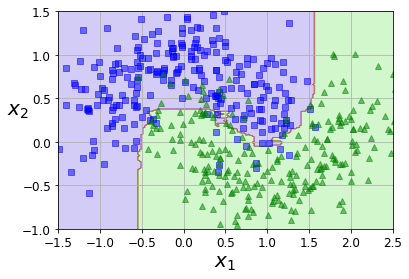

In [26]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", alpha = 0.5)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(bag_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [27]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_moons_train, y_moons_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

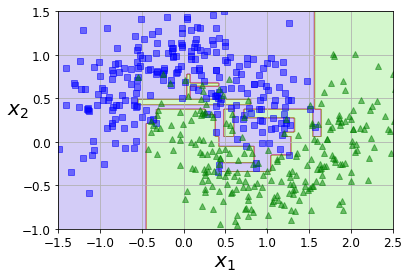

In [28]:
plot_predictions(tree_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [30]:
rnd_clf_2 = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf_2.fit(X_moons_train, y_moons_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

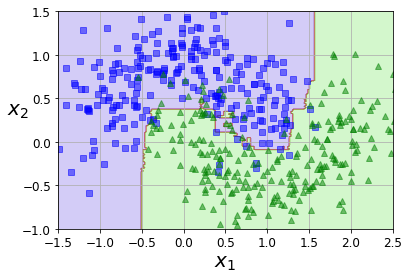

In [31]:
plot_predictions(rnd_clf_2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [35]:
xtra_clf = BaggingClassifier(
        ExtraTreeClassifier(max_leaf_nodes = 16), n_estimators = 500,
        max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True)
xtra_clf.fit(X_moons_train, y_moons_train)

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=16,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

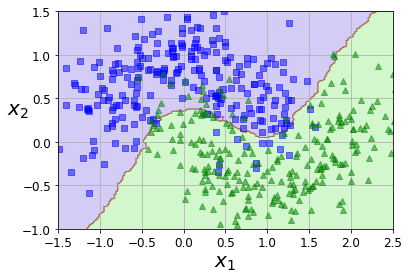

In [36]:
plot_predictions(xtra_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()